In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

In [6]:
df=pd.read_csv("Mall_Customers.csv")
df["Gender"]=LabelEncoder().fit_transform(df["Gender"])
df.rename(columns={"Annual Income (k$)":"Annual_Income","Spending Score (1-100)":"Spending_Score"},inplace=True)

In [7]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CustomerID      200 non-null    int64
 1   Gender          200 non-null    int32
 2   Age             200 non-null    int64
 3   Annual_Income   200 non-null    int64
 4   Spending_Score  200 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 7.2 KB


,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [29]:
df1=df[["Annual_Income","Spending_Score"]]
x=StandardScaler().fit_transform(df1)
df2=df[["Age","Gender","Annual_Income","Spending_Score"]]
X=StandardScaler().fit_transform(df2)

In [30]:
inertia1=[]
for k in range(1,11):
    k=KMeans(n_clusters=k, random_state=42)
    k.fit(x)
    inertia1.append(k.inertia_)
inertia2=[]
for k in range(1,11):
    k=KMeans(n_clusters=k, random_state=42)
    k.fit(X)
    inertia2.append(k.inertia_)

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

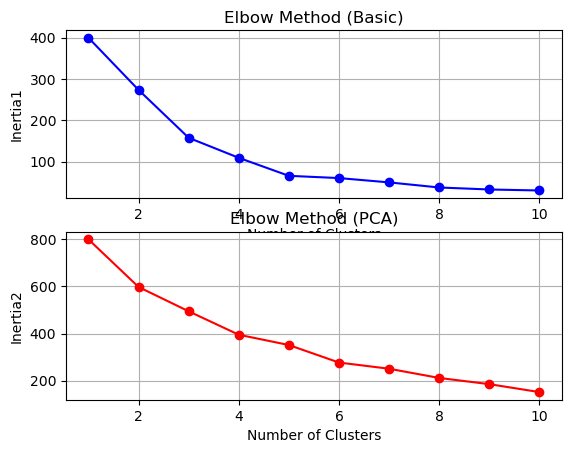

In [34]:
plt.subplot(2,1,1)
#plt.figure(figsize=(8,6))
plt.plot(range(1,11),inertia1,marker='o',c='blue')
plt.title("Elbow Method (Basic)")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia1")
plt.grid(True)

plt.subplot(2,1,2)
#plt.figure(figsize=(8,6))
plt.plot(range(1,11),inertia2,marker='o',c='red')
plt.title("Elbow Method (PCA)")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia2")
plt.grid(True)
plt.show()

In [50]:
k_pl=Pipeline([
    ("pca",PCA(n_components=2)),
    ("kmeans",KMeans(n_clusters=5,random_state=42))
])
pl_kmeans=k_pl.fit_transform(X)
kp_pred=k_pl.fit_predict(X)
df["KClusters(PCA)"]=k_pl.named_steps["kmeans"].labels_
pca_score=silhouette_score(X,kp_pred)

basic_kmeans=KMeans(n_clusters=5,random_state=42)
bs_kmeans=basic_kmeans.fit_transform(x)
kb_pred=basic_kmeans.fit_predict(x)
df["KClusters(Basic)"]=basic_kmeans.labels_
basic_score=silhouette_score(x,kb_pred)


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

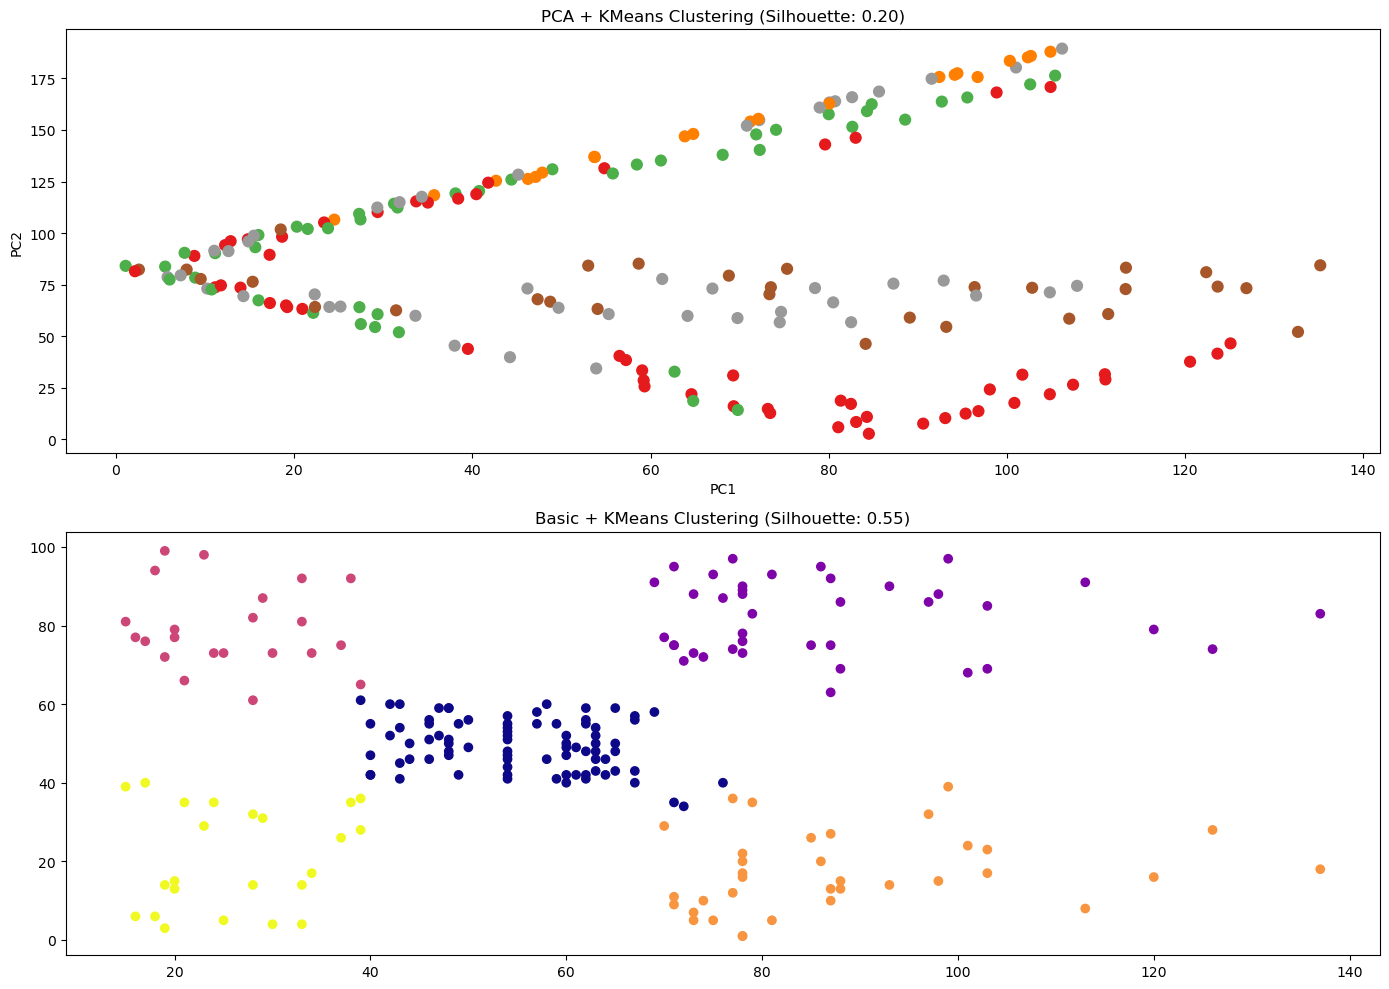

In [51]:
plt.figure(figsize=(14,10))

plt.subplot(2,1,1)
plt.title(f"PCA + KMeans Clustering (Silhouette: {pca_score:.2f})")
plt.scatter(x_kmeans[:,0],x_kmeans[:,1],c=df["KClusters(PCA)"],cmap="Set1",s=60)
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.subplot(2,1,2)
plt.title(f"Basic + KMeans Clustering (Silhouette: {basic_score:.2f})")
plt.scatter(df["Annual_Income"],df["Spending_Score"],c=df["KClusters(Basic)"],cmap="plasma")

plt.tight_layout()
plt.show()

In [54]:
pca_summary=df.groupby("KClusters(PCA)")[["Age","Gender","Annual_Income","Spending_Score"]].mean().round()
print(pca_summary)
basic_summary=df.groupby("KClusters(Basic)")[df1]
print(pca_summary)

TypeError: unhashable type: 'DataFrame'